In [2]:
%pip install dtw-python
%pip install matplotlib
%pip install datetime
%pip install requests
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import requests as req

In [4]:
from typing import List
class Yahoo:
    def __init__(self):
        pass
    
    
    def get_chart(self,symbol:str)->list:
        headers = {
            'x-api-key': "mTd2MNVwEe3WFgj5PQ66Tbpq0CyeP8Q7ESjpmYZ2"
        }
        try:
            url = f"https://yfapi.net/v8/finance/chart/{symbol}?range=1mo&region=FR&interval=1d&lang=en"
            response = req.request("GET", url, headers=headers)
            return response.json()["chart"]["result"][0]["indicators"]["quote"][0]['close']
        
        except Exception as error:
            return error
        
    def resultats_rapports(self,list_actifs:List[str])->dict:
        results = {}
        charts = {}
        for actif in list_actifs:
            charts[actif] =  self.get_chart(actif)
        
        for index in range(len(charts)-1):
            for index_next in range(len(charts)-1):
                results["distance rapport premiere valeur "+charts[index]+" "+charts[index_next]] = self.distance_rapport_premiere_valeur(charts[index],charts[index_next])
                results["distance rapport moyenne "+charts[index]+" "+charts[index_next]] = self.distance_rapport_moyenne(charts[index],charts[index_next])
                

    def distance_rapport_premiere_valeur(self,reference,comparison):  
        newreference = []
        newcomparison = []

        for i in range (0,len(reference)):
            newreference.append(reference[i] / reference[0])
            newcomparison.append(comparison[i] / comparison[0]) 

        distances = []
        for i in range (0,len(newreference)):
            distance = abs(newreference[i]-newcomparison[i])
            distances.append(distance)

        return (sum(distances),statistics.mean(distances))
    
    def distance_rapport_moyenne(self,reference,comparison):          
        newreference = []
        newcomparison = []

        for i in range (0,len(reference)):
            newreference.append(reference[i] / statistics.mean(reference))
            newcomparison.append(comparison[i] / statistics.mean(comparison)) 

        distances = []
        for i in range (0,len(newreference)):
            distance = abs(newreference[i]-newcomparison[i])
            distances.append(distance)
            
        return (sum(distances),statistics.mean(distances))
    
    
        
        

In [5]:
## Finding two different dataset

# Getting Apple chart
reference = Yahoo().get_chart("AAPL")
print (reference)

# Getting Microsoft chart
comparison = Yahoo().get_chart("MSFT")
print (comparison)

[164.32000732421875, 160.07000732421875, 162.74000549316406, 164.85000610351562, 165.1199951171875, 163.1999969482422, 166.55999755859375, 166.22999572753906, 163.1699981689453, 159.3000030517578, 157.44000244140625, 162.9499969482422, 158.52000427246094, 154.72999572753906, 150.6199951171875, 155.08999633789062, 159.58999633789062, 160.6199951171875, 163.97999572753906, 163.97999572753906]
[287.7200012207031, 280.2699890136719, 294.5899963378906, 297.30999755859375, 298.7900085449219, 294.95001220703125, 300.19000244140625, 295.9200134277344, 289.8599853515625, 278.9100036621094, 275.8500061035156, 288.5, 285.5899963378906, 280.07000732421875, 276.44000244140625, 287.1499938964844, 294.3900146484375, 295.2200012207031, 300.42999267578125, 300.42999267578125]


In [6]:
distances = []
for i in range (0,len(reference)):
    distance = abs(reference[i]-comparison[i])
    distances.append(distance)

print(distances)

[123.39999389648438, 120.19998168945312, 131.84999084472656, 132.45999145507812, 133.67001342773438, 131.75001525878906, 133.6300048828125, 129.6900177001953, 126.68998718261719, 119.61000061035156, 118.41000366210938, 125.55000305175781, 127.06999206542969, 125.34001159667969, 125.82000732421875, 132.05999755859375, 134.80001831054688, 134.60000610351562, 136.4499969482422, 136.4499969482422]


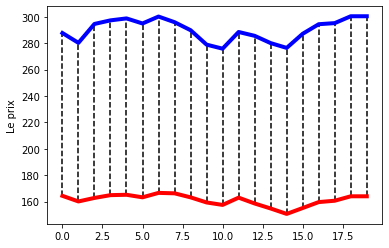

In [7]:
from pylab import *
for i in range (0,len(reference)):
    x = [i,i]
    y = [reference[i],comparison[i]]
    plot(x, y,"k--")
x = np.linspace(0, len(reference)-1, len(reference))



plot(x, reference, "r", linewidth=4)
plot(x, comparison,"b",linewidth=4)
ylabel("Le prix")

plt.show()

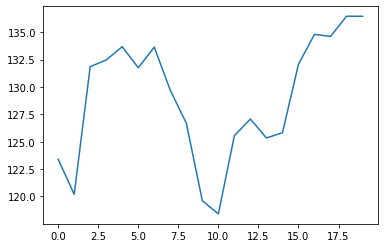

2579.500030517578
128.9750015258789


In [8]:
x = np.linspace(0, len(reference)-1, len(reference))
plot(x,distances)
plt.show()

import statistics
print(sum(distances))
print(statistics.mean(distances))

128.9750015258789


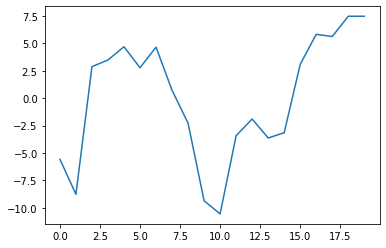

In [9]:
import statistics

moyenne = statistics.mean(distances)
print(moyenne)
variationsDistance = []
for i in range (0,len(reference)):
    valeur = distances[i] - moyenne
    variationsDistance.append(valeur)
    
plot(x,variationsDistance)
plt.show()

In [10]:
resultat = abs(statistics.mean(variationsDistance))
print(resultat)

1.1368683772161604e-14


# On comparer les jeux en ramenant à 0 par rapport à la premiere valeur

135.46014404296875
6.773007202148437


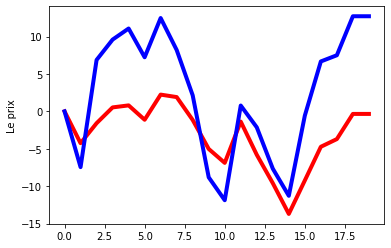

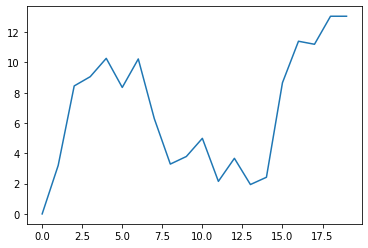

In [13]:
newreference = []
newcomparison = []

for i in range (0,len(reference)):
    newreference.append(reference[i] - reference[0])
    newcomparison.append(comparison[i] - comparison[0]) 


distances = []
for i in range (0,len(newreference)):
    distance = abs(newreference[i]-newcomparison[i])
    distances.append(distance)
    
    
import statistics
print(sum(distances))
print(statistics.mean(distances))

plot(x, newreference, "r", linewidth=4)
plot(x, newcomparison,"b",linewidth=4)
ylabel("Le prix")

plt.show()


x = np.linspace(0, len(reference)-1, len(reference))
plot(x,distances)
plt.show()

# On fait le rapport par rapport à la première valeur (reference)

0.5529990134022318
0.02764995067011159


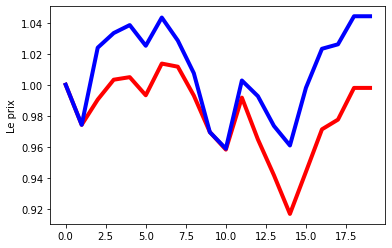

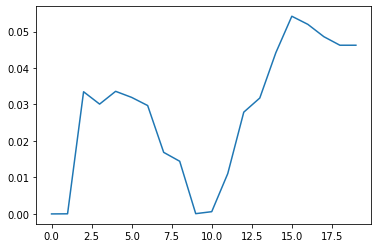

In [12]:
newreference = []
newcomparison = []

for i in range (0,len(reference)):
    newreference.append(reference[i] / reference[0])
    newcomparison.append(comparison[i] / comparison[0]) 


distances = []
for i in range (0,len(newreference)):
    distance = abs(newreference[i]-newcomparison[i])
    distances.append(distance)
    
    
import statistics
print(sum(distances))
print(statistics.mean(distances))

plot(x, newreference, "r", linewidth=4)
plot(x, newcomparison,"b",linewidth=4)
ylabel("Le prix")

plt.show()


x = np.linspace(0, len(reference)-1, len(reference))
plot(x,distances)
plt.show()